## Domestic COVID Data Exploration 

In this notebook, we explore U.S. COVID data from various sources

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
# CDC

df_vacc_up_cdc = pd.read_csv('../../data/cdc/COVID-19_Vaccinations_in_the_United_States_County.csv')
df_vacc_dist_cdc = pd.read_csv('../../data/cdc/COVID-19_Vaccinations_in_the_United_States_Jurisdiction.csv')
df_vacc_up_cdc['Date'] = pd.to_datetime(df_vacc_up_cdc['Date'], format= '%m/%d/%Y')

In [30]:
# JHU

df_vacc_up_jhu = pd.read_csv('../../data/jhu/people_vaccinated_us_timeline.csv')
df_vacc_dist_jhu = pd.read_csv('../../data/jhu/vaccine_data_us_timeline.csv')

In [4]:
#KFF

df_vacc_man = pd.read_csv('../../data/kff/vaccine_mandates.csv',  skiprows=[0,1,3,55,56,57,58])

### Dictionary

In [5]:
dict = {
    "AK" : "Alaska", 
    "AL" : "Alabama", 
    "AS" : "American Samoa", 
    "AZ" : "Arizona",
    "CA" : "California",
    "CO" : "Colorado",
    "CT" : "Conneticut",
    "DC" : "District of Columbia",
    "DE" : "Delaware",
    "FL" : "Florida",
    "GA" : "Georgia",
    "HI" : "Hawaii",
    "IA" : "Iowa", 
    "ID" : "Idaho",
    "IL" : "Illinois",
    "IN" : "Indiana",
    "KS" : "Kansas",
    "KY" : "Kentucky",
    "LA" : "Louisiana",
    "MA" : "Massachusetts",
    "MD" : "Maryland",
    "ME" : "Maine",
    "MI" : "Michigan",
    "MN" : "Minnesota",
    "MO" : "Missouri",
    "MS" : "Mississippi",
    "MT" : "Montana",
    "NC" : "North Carolina",
    "ND" : "North Dakota",
    "NE" : "Nebraska",
    "NH" : "New Hampshire",
    "NJ" : "New Jersey",
    "NM" : "New Mexico",
    "NV" : "Nevada",
    "NY" : "New York",
    "OH" : "Ohio",
    "OK" : "Oklahoma",
    "OR" : "Oregon",
    "PA" : "Pennsylvania",
    "RI" : "Rhode Island",
    "SC" : "South Carolina",
    "SD" : "South Dakota",
    "TN" : "Tennessee",
    "TX" : "Texas",
    "UT" : "Utah",
    "VA" : "Virgina",
    "VT" : "Vermont",
    "WA" : "Washington",
    "WI" : "Wisconsin",
    "WV" : "West Virgina",
    "WY" : "Wyoming"
    }

In [6]:
df_vacc_up_cdc.replace({"Recip_State": dict},inplace=True)

### Analyses

In [8]:
man_yes = df_vacc_man.loc[df_vacc_man['Any Mandate in Place?'] == 'Yes']
man_no = df_vacc_man.loc[df_vacc_man['Any Mandate in Place?'] == 'No']
man_proh = df_vacc_man.loc[df_vacc_man['Any Mandate in Place?'] == 'Prohibited']

In [9]:
# CDC Filter

vacc_yes_cdc = df_vacc_up_cdc.loc[df_vacc_up_cdc.Recip_State.isin(man_yes.Location)]
vacc_no_cdc = df_vacc_up_cdc.loc[df_vacc_up_cdc.Recip_State.isin(man_no.Location)]
vacc_proh_cdc = df_vacc_up_cdc.loc[df_vacc_up_cdc.Recip_State.isin(man_proh.Location)]

In [18]:
# JHU Filter

vacc_yes_jhu = df_vacc_up_jhu.loc[df_vacc_up_jhu.Province_State.isin(man_yes.Location)]
vacc_no_jhu = df_vacc_up_jhu.loc[df_vacc_up_jhu.Province_State.isin(man_no.Location)]
vacc_proh_jhu = df_vacc_up_jhu.loc[df_vacc_up_jhu.Province_State.isin(man_proh.Location)]

In [21]:
vacc_all_cdc = pd.concat([vacc_yes_cdc, vacc_no_cdc, vacc_proh_cdc], keys=['Yes', 'No', 'Prohibited']).reset_index()
vacc_all_jhu = pd.concat([vacc_yes_jhu, vacc_no_jhu, vacc_proh_jhu], keys=['Yes', 'No', 'Prohibited']).reset_index()

In [56]:
vacc_all_jhu.head()

,level_0,level_1,FIPS,Province_State,Country_Region,Date,Lat,Long_,Combined_Key,People_Fully_Vaccinated,People_Partially_Vaccinated
0,Yes,2280,6.0,California,US,2020-12-10,36.1162,-119.6816,"California, US",NaN,NaN
1,Yes,2281,6.0,California,US,2020-12-11,36.1162,-119.6816,"California, US",NaN,NaN
2,Yes,2282,6.0,California,US,2020-12-12,36.1162,-119.6816,"California, US",NaN,NaN
3,Yes,2283,6.0,California,US,2020-12-13,36.1162,-119.6816,"California, US",NaN,NaN
4,Yes,2284,6.0,California,US,2020-12-14,36.1162,-119.6816,"California, US",NaN,NaN


In [60]:
state_pop = vacc_all_cdc.loc[vacc_all_cdc.Date == '2022-02-15']
state_pop_grouped = state_pop.groupby('Recip_State').sum()

In [62]:
## Missing Arkansas, West Virginia, Nevada, Virgina 

state_pop_grouped.head()

,level_1,MMWR_week,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,Administered_Dose1_Recip_5Plus,Administered_Dose1_Recip_5PlusPop_Pct,Administered_Dose1_Recip_12Plus,Administered_Dose1_Recip_12PlusPop_Pct,Administered_Dose1_Recip_18Plus,...,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
Recip_State,,,,,,,,,,,,,,,,,,,,,
Alabama,5020644,476,6283.2,3021405.0,3543.3,3021003.0,3760.7,2962270.0,4066.8,2801954.0,...,335.0,355.0,375.0,385.0,396.0,4903185.0,4608828.0,4186880.0,3814879.0,849837.0
Alaska,2213957,210,2931.0,499502.0,1995.0,499341.0,2130.1,479230.0,2257.0,443892.0,...,205.0,209.0,209.0,209.0,205.0,731545.0,680465.0,608877.0,551562.0,91588.0
Arizona,1189968,112,1563.2,5168166.0,1091.5,5167276.0,1145.7,4969441.0,1191.3,4591156.0,...,84.0,84.0,87.0,87.0,85.0,7278717.0,6848929.0,6206060.0,5638481.0,1308633.0
California,4353939,413,4977.6,32123968.0,3570.6,32111273.0,3768.9,30763157.0,3979.1,28317558.0,...,245.0,248.0,249.0,250.0,251.0,39512223.0,37128507.0,33646265.0,30617582.0,5838115.0
Colorado,4796577,455,6311.5,4492503.0,3934.6,4485013.0,3864.9,4296648.0,4064.9,3987409.0,...,403.0,413.0,423.0,425.0,431.0,5758736.0,5426535.0,4936061.0,4499217.0,842412.0


<AxesSubplot:xlabel='Date', ylabel='People_Fully_Vaccinated'>

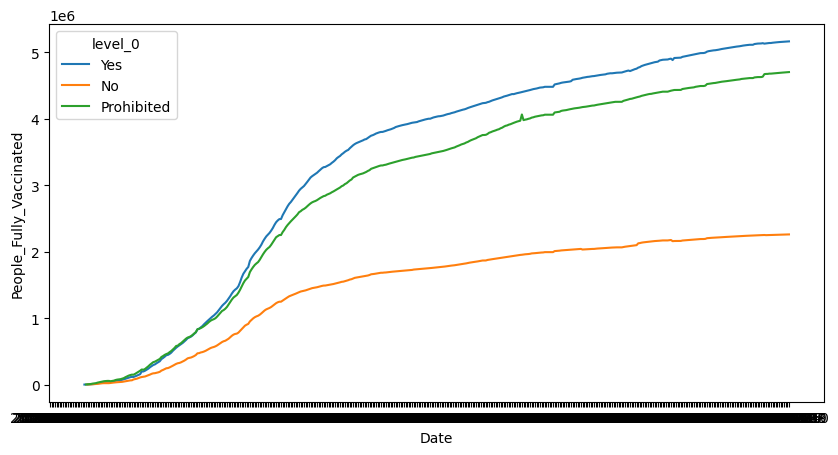

In [27]:
fig, ax = plt.subplots(figsize=(10,5), dpi = 100)

sns.lineplot(
    data = vacc_all_jhu,
    x = 'Date',
    y = "People_Fully_Vaccinated",
    hue = 'level_0',
    ci=None
)

<AxesSubplot:xlabel='Date', ylabel='Administered_Dose1_Pop_Pct'>

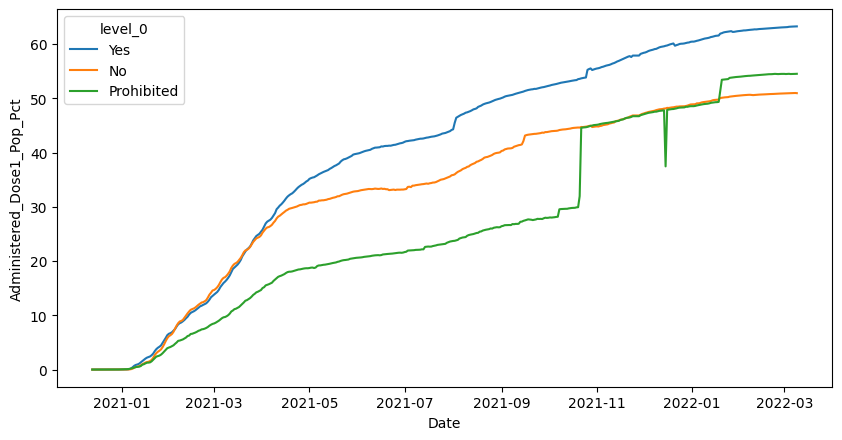

In [49]:
fig, ax = plt.subplots(figsize=(10,5), dpi = 100)

sns.lineplot(
    data = vacc_all_cdc,
    x = 'Date',
    y = "Administered_Dose1_Pop_Pct",
    hue = 'level_0',
    ci=None
)

In [46]:
start_date = '2021-10-01'
end_date = '2022-02-28'

after_start_date = vacc_all_cdc['Date'] >= start_date
before_end_date = vacc_all_cdc['Date'] <= end_date

between_two_dates = after_start_date & before_end_date

vacc_all_dates = vacc_all_cdc.loc[between_two_dates]
vacc_all_dates

,level_0,level_1,Date,FIPS,MMWR_week,Recip_County,Recip_State,Completeness_pct,Administered_Dose1_Recip,Administered_Dose1_Pop_Pct,...,Series_Complete_Pop_Pct_UR_Equity,Series_Complete_5PlusPop_Pct_UR_Equity,Series_Complete_12PlusPop_Pct_UR_Equity,Series_Complete_18PlusPop_Pct_UR_Equity,Series_Complete_65PlusPop_Pct_UR_Equity,Census2019,Census2019_5PlusPop,Census2019_12PlusPop,Census2019_18PlusPop,Census2019_65PlusPop
7677,Yes,29551,2022-02-28,41009,9,Columbia County,Oregon,97.8,35877.0,68.5,...,4.0,4.0,4.0,4.0,4.0,52354.0,49599.0,45343.0,41479.0,10044.0
7678,Yes,29556,2022-02-28,41003,9,Benton County,Oregon,97.8,75006.0,80.6,...,4.0,4.0,4.0,4.0,4.0,93053.0,89308.0,83595.0,78040.0,15639.0
7679,Yes,29560,2022-02-28,37193,9,Wilkes County,North Carolina,97.0,42555.0,62.2,...,7.0,7.0,8.0,8.0,7.0,68412.0,64946.0,59783.0,54628.0,15162.0
7680,Yes,29570,2022-02-28,35031,9,McKinley County,New Mexico,97.0,86617.0,95.0,...,8.0,8.0,8.0,8.0,8.0,71367.0,66760.0,58282.0,51282.0,9200.0
7681,Yes,29576,2022-02-28,17093,9,Kendall County,Illinois,98.0,95526.0,74.1,...,4.0,4.0,4.0,4.0,4.0,128990.0,120620.0,106087.0,92730.0,13824.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1039058,Prohibited,525251,2021-10-01,13031,39,Bulloch County,Georgia,57.0,23709.0,29.8,...,5.0,NaN,5.0,5.0,7.0,79608.0,NaN,69037.0,63851.0,NaN
1039059,Prohibited,525253,2021-10-01,01107,39,Pickens County,Alabama,92.5,10259.0,51.5,...,3.0,NaN,3.0,3.0,3.0,19930.0,NaN,17414.0,16066.0,NaN
1039060,Prohibited,525254,2021-10-01,13307,39,Webster County,Georgia,57.0,529.0,20.3,...,5.0,NaN,5.0,5.0,5.0,2607.0,NaN,2325.0,2124.0,NaN
1039061,Prohibited,525255,2021-10-01,26085,39,Lake County,Michigan,94.3,6163.0,52.0,...,8.0,NaN,8.0,8.0,7.0,11853.0,NaN,10551.0,9901.0,NaN
